# Device-based Identity

## Welcome to your notebook!

This is a new notebook -- all your code and the variables and functions you defined in the last notebook don't exist here.

We'll use this notebook for a dataset using different featuers collected from different user's phones, collected and made [publicly available](http://extrasensory.ucsd.edu/) as part of a study at UCSD. 

## Loading the dataset

We'll use the same pandas library to load our new dataset

In [1]:
import pandas as pd

data = pd.read_csv("../data/device_data.csv", index_col=0)
data.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,label:SITTING,label:FIX_walking,label:PHONE_IN_POCKET,label:TALKING,label:EATING,label:OR_standing,label:AT_SCHOOL,label:PHONE_ON_TABLE,label_source,user
3,1.015699,0.027573,-0.028638,0.059668,1.001249,1.015349,1.028801,1.553481,6.684238,5.043664,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0
4,1.004165,0.004350,0.003924,0.008734,1.002152,1.004135,1.006153,1.603221,6.684602,5.043238,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0
5,1.007694,0.047737,0.077943,0.145109,0.999076,1.006514,1.013956,0.541839,6.683538,5.041790,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0
6,1.008624,0.026497,0.034874,0.064660,1.000654,1.007806,1.015870,1.275550,6.684272,5.043415,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0
7,1.007059,0.019110,0.009605,0.038648,0.999606,1.006908,1.014013,1.581801,6.684432,5.043531,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0


This dataset has a lot of features, and this time, the column names are not anonymized!

Let's take a look at what we have.

In [2]:
list(data.columns)

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std',
 'proc_gyro

## Building our model

Our "inputs" and "outputs" are a little different now, as we aren't making a direct prediction.

Instead, we're interested in using the data to understand user behavior, so we won't include information about which user an observation is associated with in our clustering.

In [3]:
X = data.drop('user', axis=1)
y = data['user']

from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=2, random_state=22).fit_transform(X.values)

Let's take a look at our clustered observations.

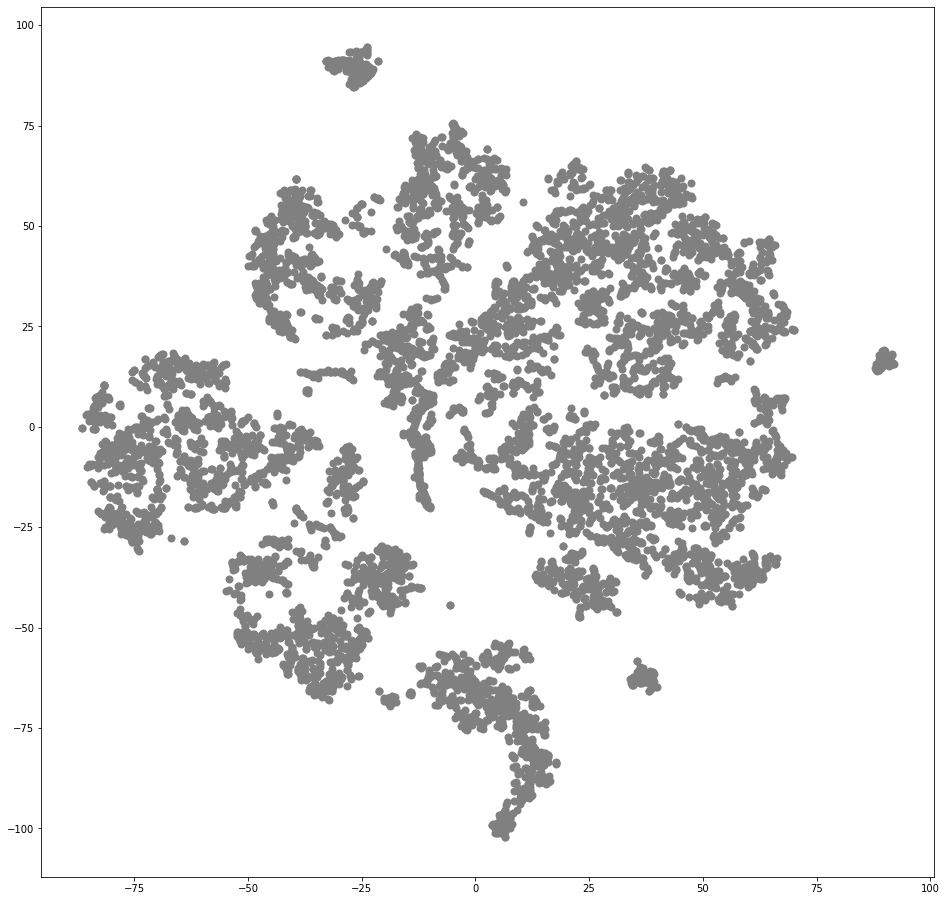

In [5]:
import matplotlib.pyplot as plt

f, (ax1) = plt.subplots(1, 1, figsize=(16,16))
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c='gray', cmap='viridis', linewidths=2)

# Evaluating our model

Clearly there are clusters, but how well do they help us understand identity?

Let's see the same mapping, but highlight each observation with the correct user from our dataset.

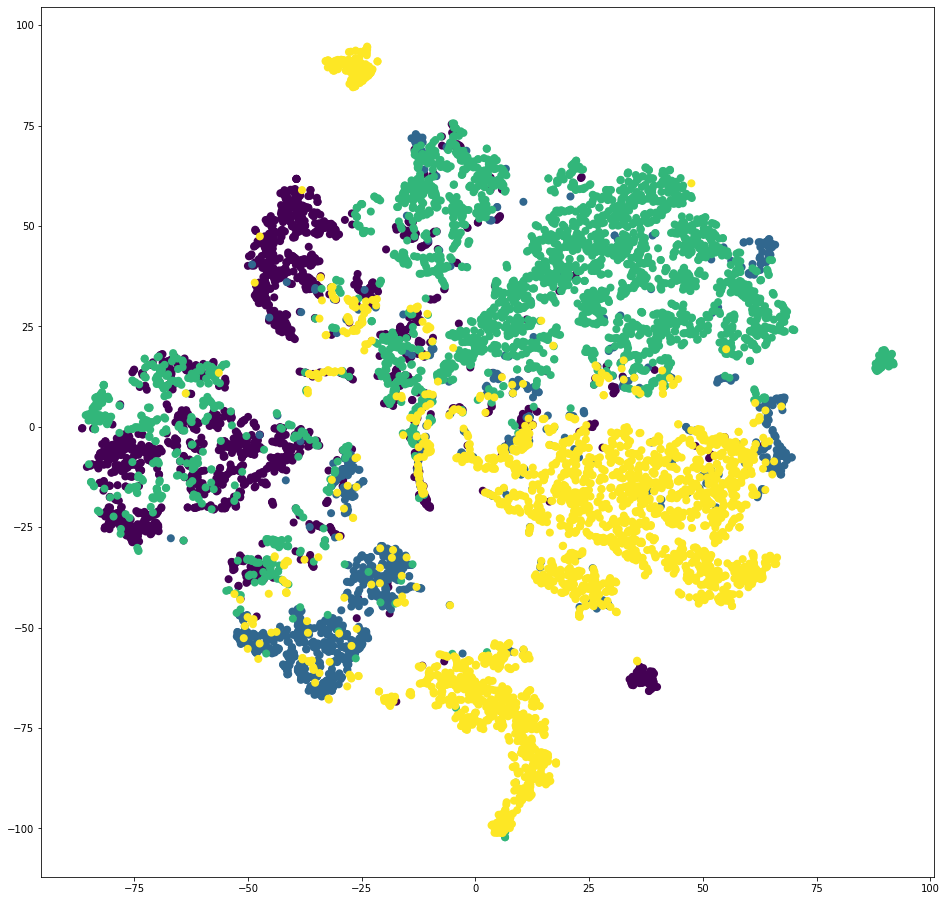

In [6]:
f, (ax1) = plt.subplots(1, 1, figsize=(16,16))
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap='viridis', linewidths=2)

## Model iteration

Choose specific labels to dive deeper into your exploration of the dataset. What do you notice?

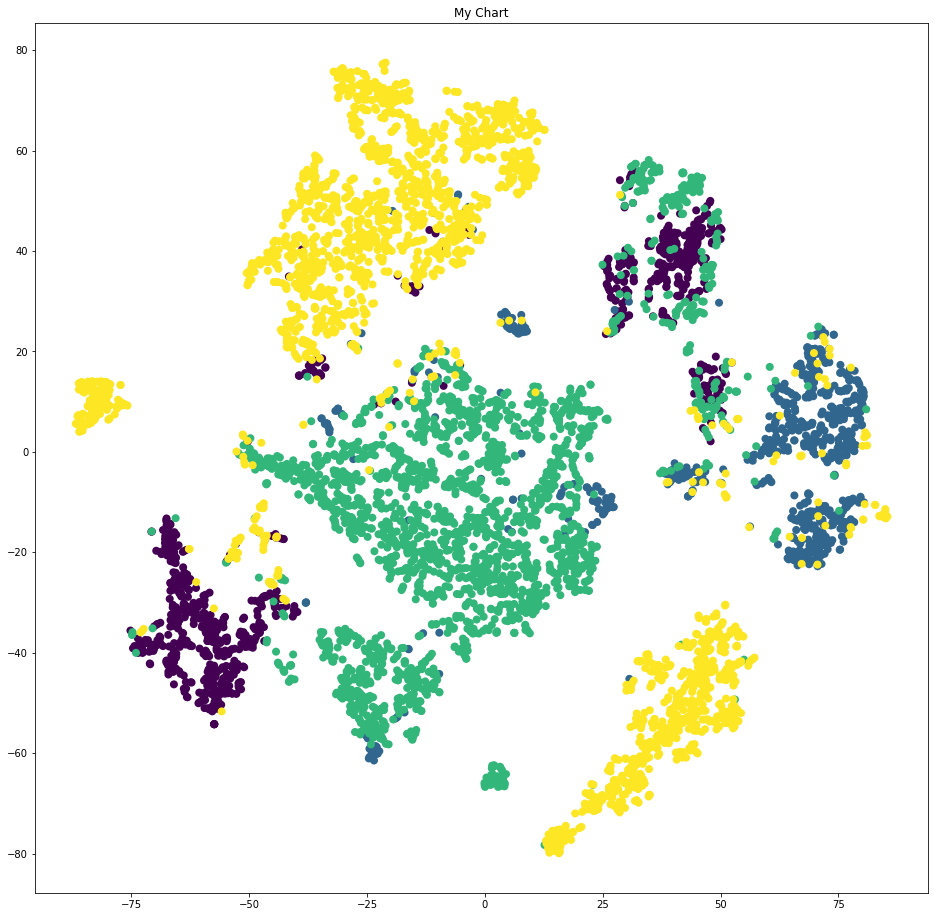

In [7]:
# Which column do you want to focus on? (Check out the labels in the columns list for options)
COLUMN_NAME = "label:PHONE_ON_TABLE"

# What value should be in that column? 0: label not applied, 1: label applied
VALUE = 1

# Give your chart a useful title
TITLE = "My Chart"

temp_data = data[data[COLUMN_NAME] == VALUE]

X = temp_data.drop('user', axis=1)
y = temp_data['user']

X_reduced_tsne = TSNE(n_components=2, random_state=22).fit_transform(X.values)

f, (ax1) = plt.subplots(1, 1, figsize=(16,16))
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap='viridis', linewidths=2)
plt.title(TITLE)
plt.show()